<a href="https://colab.research.google.com/github/gabriellaawidd/Stage3_Assignment1_UNI174_RPP/blob/main/AirQualitySummary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import/Download/Install

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib

In [17]:
from google.colab import files
uploaded = files.upload()

Saving air_quality_data.csv to air_quality_data.csv


#Data PreProcessing

In [25]:
df = pd.read_csv("/content/air_quality_data.csv")
df.head()

,timestamp,temperature,humidity,pollution_ppm
0,2025-05-03 10:00:00,31.0,57,20
1,2025-05-03 11:00:00,29.7,58,52
2,2025-05-03 12:00:00,31.3,60,100
3,2025-05-03 13:00:00,33.0,60,104
4,2025-05-03 14:00:00,29.5,48,64


In [26]:
def classify_air_quality(ppm):
    if ppm < 22:
        return "Baik"
    elif ppm < 50:
        return "Sedang"
    else:
        return "Buruk"

df["kualitas_udara"] = df["pollution_ppm"].apply(classify_air_quality)
df[["pollution_ppm", "kualitas_udara"]].head()

,pollution_ppm,kualitas_udara
0,20,Baik
1,52,Buruk
2,100,Buruk
3,104,Buruk
4,64,Buruk


In [29]:
X = df[["pollution_ppm", "temperature", "humidity"]]
y = df["kualitas_udara"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Model Train

In [21]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', RandomForestClassifier(random_state=42))])

#Evaluation

In [22]:
from sklearn.metrics import classification_report

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Baik       1.00      1.00      1.00         3
       Buruk       1.00      1.00      1.00        31
      Sedang       1.00      1.00      1.00         6

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



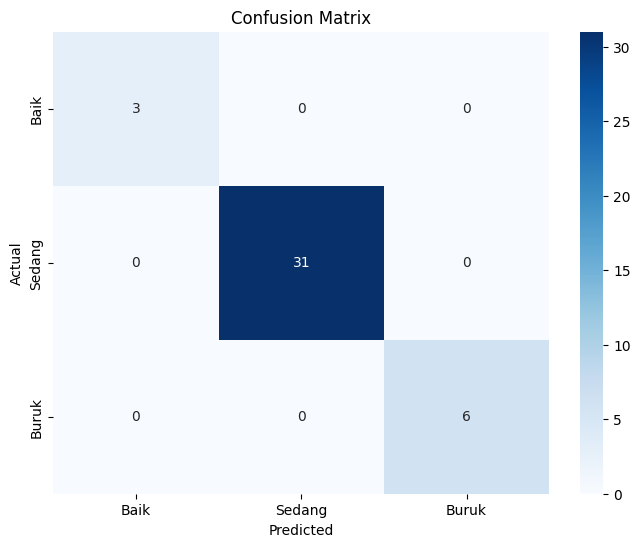

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Baik", "Sedang", "Buruk"],
            yticklabels=["Baik", "Sedang", "Buruk"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


#Save Model

In [30]:
joblib.dump(pipeline, "air_quality_model.sav")

['air_quality_model.sav']